In [1]:
from random import gauss
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
import math

import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

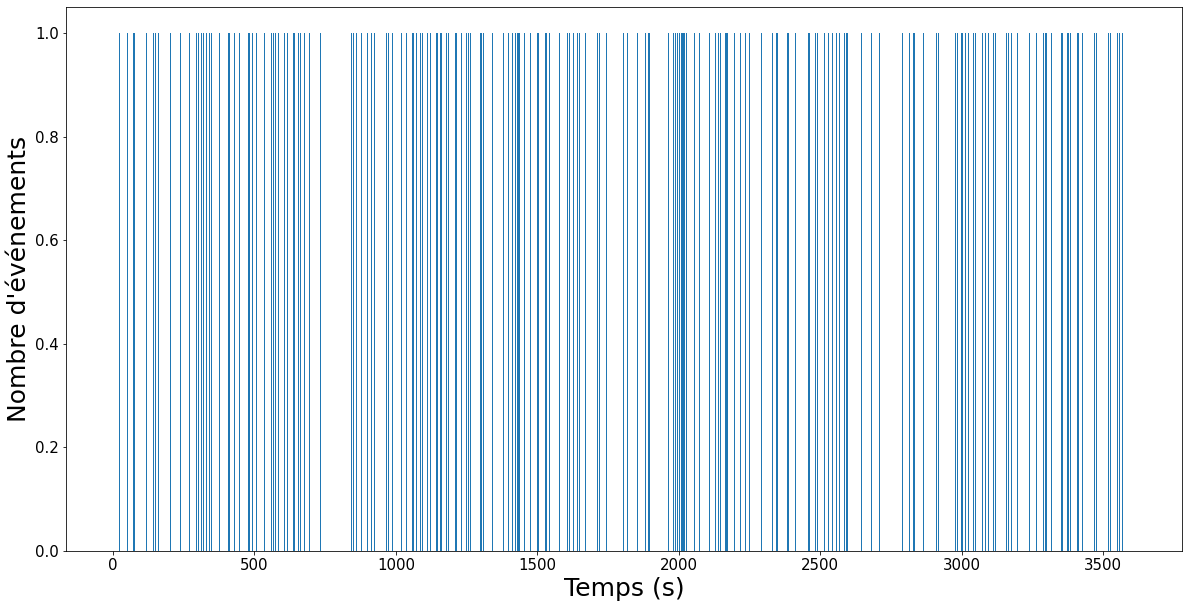

In [2]:
#On choisit le nombre d'événements avec une distribution de poisson et une distribution uniforme dans le temps
N_ev=np.random.poisson(1000)
t=np.random.uniform(0,3600,N_ev)
#utiliser random normal np random gauss
#faire une fonction

#On choisit les paramètres de l'anomalie gaussienne
nombre_anomalie_gauss=2  #On choisit le nombre d'anomalie
t_anomalie=[3000,2000] #On choisit quand se passe l'anomalie (moyenne de la gaussienne)
long_flare=[10,20]  #On choisit la longueur du flare (écart type)
N_ev_anomalie=[20,20] #On choisit le nombre d'événement de l'anomalie

anomalie_gauss = [None for x in range(nombre_anomalie_gauss)]
t_finale=[None for x in range(nombre_anomalie_gauss)]

for j in range(len(t_anomalie)):
    if j==0:
        anomalie_gauss[j]=[gauss(t_anomalie[j],long_flare[j]) for i in range(N_ev_anomalie[j])]
        t_finale[j]=np.append(t,anomalie_gauss[j])
    else:
        anomalie_gauss[j]=[gauss(t_anomalie[j],long_flare[j]) for i in range(N_ev_anomalie[j])]
        t_finale[j]=np.append(t_finale[j-1],anomalie_gauss[j])


#On plotte le diagramme
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(t_finale[nombre_anomalie_gauss-1],1)
ax.set_xlabel("Temps (s)",fontsize=25)
ax.set_ylabel("Nombre d'événements",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

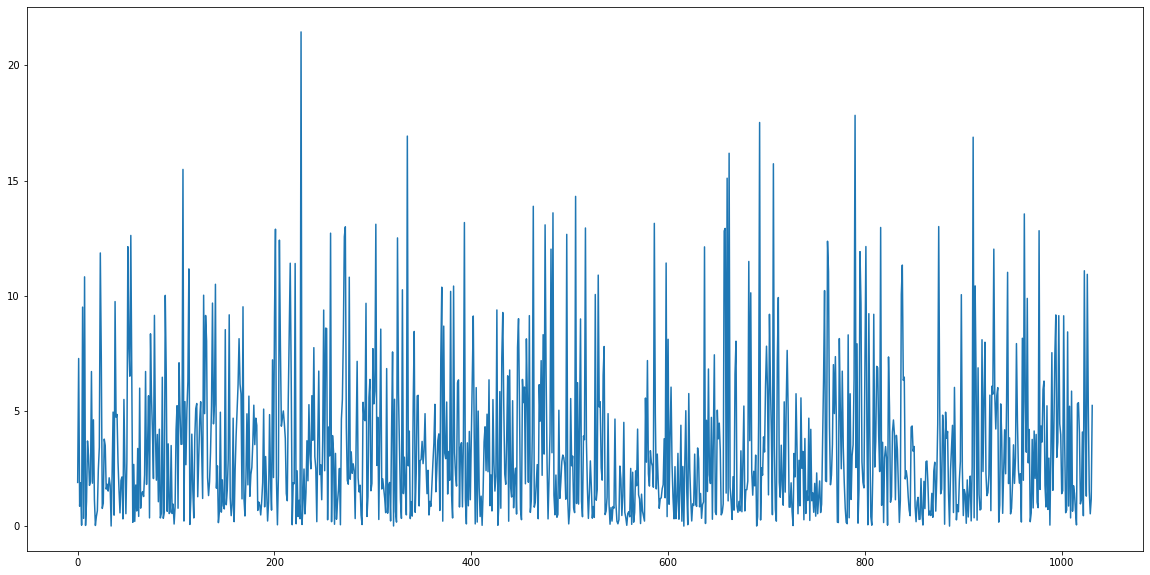

In [3]:
#On représente différences entre 2 instants d'événements consécutifs
data=np.sort(t_finale[nombre_anomalie_gauss-1])
x1=np.arange(0,np.diff(data).size)
y1=np.diff(data)

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(x1,y1)

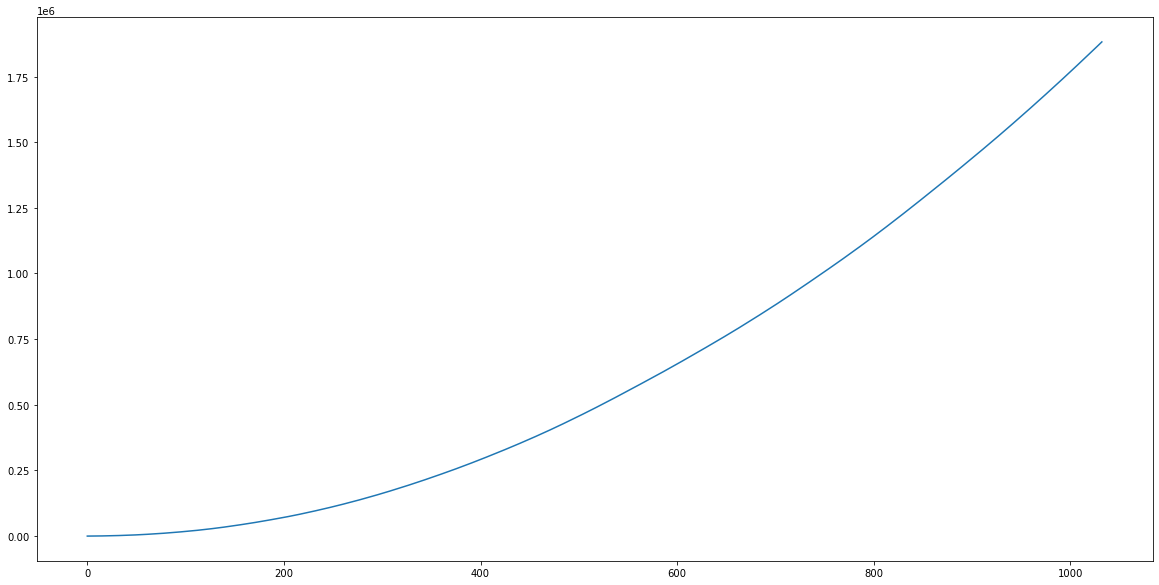

In [4]:
#On représente la fonction cumulative
x2=np.arange(0,np.cumsum(data).size)
y2=np.cumsum(data)

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(x2,y2)

In [5]:
#On crée une fonction capable de refaire le graphe précédent, où les arguments
#contiennent les paramètre de la simulation et ceux du flares

def f(moyenne_poisson,nombre_anomalie_gauss,t_anomalie,long_flare,N_ev_anomalie):
    N_ev=np.random.poisson(moyenne_poisson)
    t=np.random.uniform(0,3600,N_ev)
    anomalie_gauss = [None for x in range(nombre_anomalie_gauss)]
    t_finale=[None for x in range(nombre_anomalie_gauss)]

    for j in range(len(t_anomalie)):
        if j==0:
            anomalie_gauss[j]=[gauss(t_anomalie[j],long_flare[j]) for i in range(N_ev_anomalie[j])]
            t_finale[j]=np.append(t,anomalie_gauss[j])
        else:
            anomalie_gauss[j]=[gauss(t_anomalie[j],long_flare[j]) for i in range(N_ev_anomalie[j])]
            t_finale[j]=np.append(t_finale[j-1],anomalie_gauss[j])


    #On plotte le diagramme
    fig, ax = plt.subplots(figsize=(20,10))
    plt.bar(t_finale[nombre_anomalie_gauss-1],1)
    ax.set_xlabel("seconde",fontsize=25)
    ax.set_ylabel("Nombre d'événements",fontsize=25)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

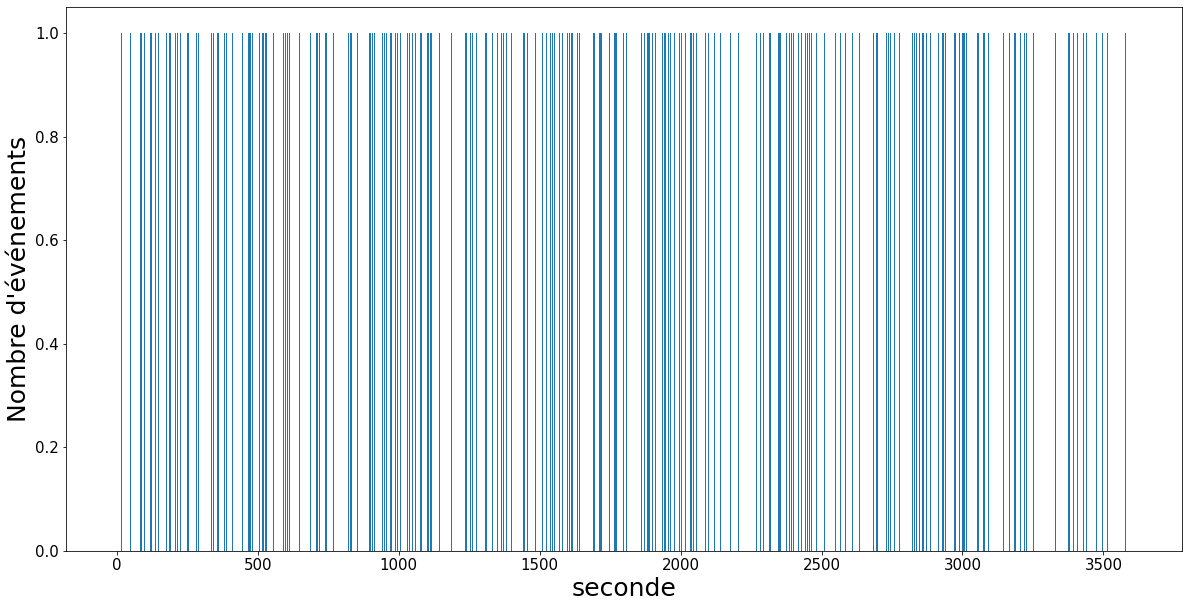

In [6]:
f(1000,2,[3000,2000],[10,20],[20,20])